In [22]:
#Recognizing text in license plates images using OpenCV and Tesseract OCR
!pip install --upgrade pytesseract wget


Requirement already up-to-date: pytesseract in c:\users\vishesh\anaconda3\lib\site-packages (0.3.3)
Requirement already up-to-date: wget in c:\users\vishesh\anaconda3\lib\site-packages (3.2)


In [47]:
# Loading the required python modules
import pytesseract
import matplotlib.pyplot as plt
import cv2
import glob
import os
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [48]:
#Performing OCR using Tesseract Engine on License Plates
import wget, zipfile, os
filename='license-plates'
if not os.path.isfile(filename):
    filename = wget.download('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/license-plates.zip')
    with zipfile.ZipFile("license-plates.zip","r") as zip_ref:
        zip_ref.extractall()
        


100% [............................................................................] 131666 / 131666

In [49]:
path_lp = os.getcwd() + "/license-plates/**/*.jpg"
list_lp = []
predicted_lp = []
for lp in glob.glob(path_lp , recursive=True):
    lp_file = lp.split("/")[-1]
    license_plate, _ = os.path.splitext(lp_file)
    #appending actual license plates into a list
    list_lp.append(license_plate)
    # reading each license plate using OpenCV
    img = cv2.imread(lp)
    '''
    We then pass each license plate image file to the Tesseract OCR engine using 
    the Python library wrapper for it. We get back a predicted_result for the license plate.
    We append the predicted_result in a list and compare it with the original the license plate
    '''
    predicted_result = pytesseract.image_to_string(img , lang='eng', config='--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
    filter_pr = "".join(predicted_result.split()).replace(":","").replace("-","")
    predicted_lp.append(filter_pr)


In [56]:
print("Actual License Plate", "\t", "Predicted License Plate", "\t")
print("--------------------", "\t", "-----------------------", "\t")
def print_actual_predicted(actual_list , predicted_list):
    for actual_plate,predict_plate in zip(actual_list , predicted_list):
        print("", actual_plate, "\t", predict_plate, "\t\t  ")
print_actual_predicted(list_lp,predicted_lp)
            

Actual License Plate 	 Predicted License Plate 	
-------------------- 	 ----------------------- 	
 license-plates\AYO9034 	 AYO9034 		  
 license-plates\GWT2180 	 GWT2120 		  
 license-plates\JSQ1413 	 JSQ|413 		  
 license-plates\NTK5785 	 NTK5785 		  
 license-plates\NYY1710 	 NYY1710 		  
 license-plates\NZW2197 	 NZW2197 		  
 license-plates\OCX4764 	 OCX4764 		  
 license-plates\ODJ1599 	 ODJ1599 		  
 license-plates\OKS0078 	 OKS0078 		  
 license-plates\OKV8004 	 OKV8004 		  
 license-plates\OLA1208 	 OLA1208 		  
 license-plates\OLC4728 	 OLC4728 		  
 license-plates\OUP9563 	 OUP9563 		  
 license-plates\OYJ9557 	 OYJ9557 		  
 license-plates\PJB2414 	 PJB2414 		  
 license-plates\PJB7392 	 PJB7392 		  
 license-plates\PJD2685 	 PJD2685 		  
 license-plates\PJG0783 	 PJG0783 		  


Text(0.5, 1.0, 'GWT2180 license plate')

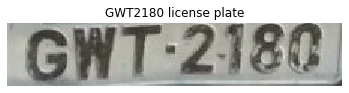

In [57]:
#for incorrect solutions we will do image resize,grayscale,denoising the image
#Then , we will pass it from the Tesseract OCR.
#example GWT2180 -- > GWT2120
# Read the license plate file and display it
test_license_plate = cv2.imread(os.getcwd() + "/license-plates/GWT2180.jpg")
plt.imshow(test_license_plate)
plt.axis('off')
plt.title('GWT2180 license plate')

In [58]:
#RESIZING THE IMAGE
resize_test_license_plate = cv2.resize(test_license_plate, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

In [59]:
#grayscale
grayscale_resize_test_license_plate = cv2.cvtColor(resize_test_license_plate, cv2.COLOR_BGR2GRAY)


In [60]:
#Denoising the image using GaussianBlur
gaussian_blur_license_plate = cv2.GaussianBlur(grayscale_resize_test_license_plate, (5, 5), 0)
#pass it from the Tesseract OCR
new_predicted_result_GWT2180 = pytesseract.image_to_string(gaussian_blur_license_plate, lang='eng',
config='--oem 3 -l eng --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
filter_new_predicted_result_GWT2180 = "".join(new_predicted_result_GWT2180.split()).replace(":", "").replace("-", "")
print(filter_new_predicted_result_GWT2180)

GWT2180
